# 11_C_Comparison_Mini_Mavic
In diesem Jupyter Notebook werden Bilder von Testtafeln in einer Visualisierung kombiniert. 

*Der folgende Code wurde mithilfe von ChatGPT (OpenAI) erstellt und bearbeitet.*

### 1. Zusammenstellung der Aufnahmen

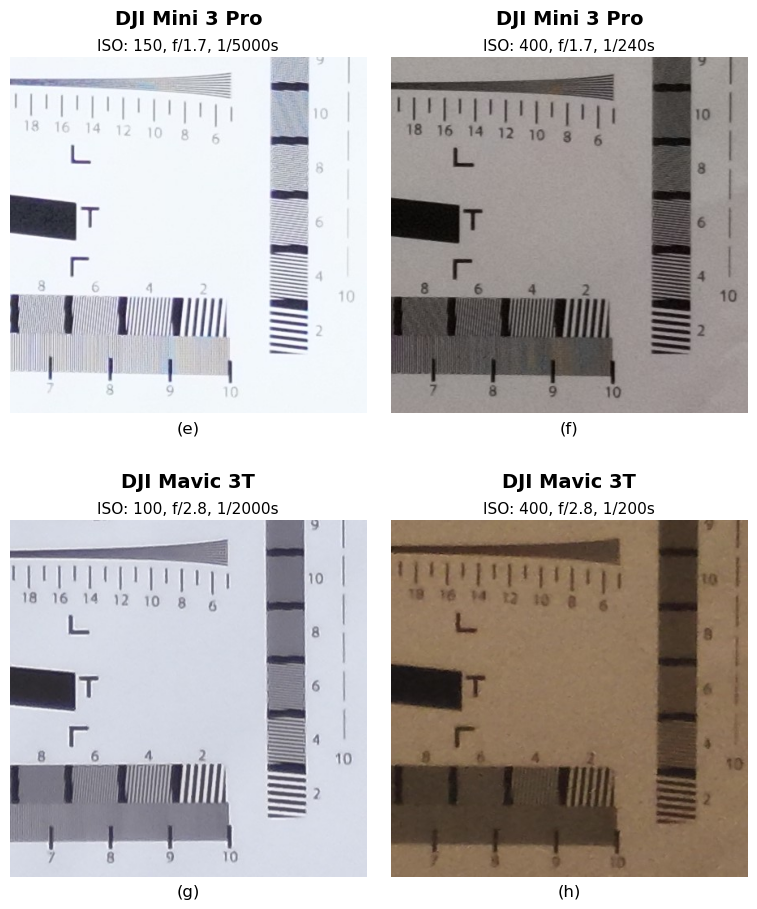

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Manuelle Metadaten (in Reihenfolge der Bilder)
manual_metadata = [
    "ISO: 150, f/1.7, 1/5000s",     # DJI Mini 3 Pro – normal
    "ISO: 400, f/1.7, 1/240s",       # DJI Mini 3 Pro – lowlight
    "ISO: 100, f/2.8, 1/2000s",     # DJI Mavic 3T – normal
    "ISO: 400, f/2.8, 1/200s"       # DJI Mavic 3T – lowlight
]

# Eingabe
base_dir = "110_C_BaseData"
image_files = [
    "DJIMini3Pro/Mini3Pro_48MP_ISO150_f1.7_T1-5000_clipped.JPG",
    "DJIMini3Pro/Mini3Pro_48MP_ISO400_f1.7_T1-240_clipped.JPG",
    "DJIMavic3T/Mavic3T_48MP_ISO100_f2.8_T1-2000_clipped.JPG",
    "DJIMavic3T/Mavic3T_48MP_ISO400_f2.8_T1-200_clipped.JPG"
]
image_paths = [os.path.join(base_dir, f) for f in image_files]
subfig_labels = ['(e)', '(f)', '(g)', '(h)']

# Bild zuschneiden
crop_size = 440

fig, axes = plt.subplots(2, 2, figsize=(8, 10), gridspec_kw={'hspace': 0.3, 'wspace': 0.05})

for i, (path, label) in enumerate(zip(image_paths, subfig_labels)):
    img = Image.open(path)
    width, height = img.size
    crop_box = (
        width // 2 - crop_size // 2,
        height // 2 - crop_size // 2,
        width // 2 + crop_size // 2,
        height // 2 + crop_size // 2
    )
    cropped = img.crop(crop_box)

    # Kamera
    if "Mini3Pro" in path:
        camera = "DJI Mini 3 Pro"
    else:
        camera = "DJI Mavic 3T"

    # Zeile & Spalte
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.imshow(cropped)
    ax.axis("off")

    # Beschriftungen
    ax.text(0.5, 1.08, camera, fontsize=14, fontweight='bold',
            ha='center', va='bottom', transform=ax.transAxes)
    ax.text(0.5, 1.01, manual_metadata[i], fontsize=11,
            ha='center', va='bottom', transform=ax.transAxes)
    ax.text(0.5, -0.02, label, fontsize=12,
            ha='center', va='top', transform=ax.transAxes)

plt.subplots_adjust(top=0.92, bottom=0.1, left=0.05, right=0.98)
plt.show()
